Business problem : A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.
The company is looking at prospective properties to buy to enter the market.
We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:

    #Which variables are significant in predicting the price of a house, and

    #How well those variables describe the price of a house.
    
    #determining the optimal value of lambda for ridge and lasso regression.

Buisness Goal : We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1402]:
#Import Space - Importing all the vital libraries
import pandas as pd
import numpy as np
import sys
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import scale
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as skl
from sklearn import preprocessing


In [1403]:
#Ignoring Warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [1404]:
#Reading CSV into a dataframe
housing_df = pd.read_csv(r'C:\Users\amanjha\Desktop\advanced Regression\Adv Reg Assign\train.csv')

# Understanding Data  

In [1405]:
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [1406]:
#Data Checks
housing_df.dtypes 

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [1407]:
#Data Understanding 
housing_df.shape

(1460, 81)

In [1408]:
#Data Understanding 
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1409]:
#Data Understanding
housing_df.describe([0.25,0.50,0.75,0.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
99%        ...         505.460000   285.820000     261.050000   168.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
99%     268.050000     0.000000    700.000000    12.000000  2010.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
99%    442567.010000  
max    755000.000000  

[9 rows x 38 columns]

### Data Prep

In [1410]:
#Checking for total count & percentage of null values in all columns of dataframe.

total = pd.DataFrame(housing_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(housing_df.isnull().sum()/housing_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
PoolQC          1453       99.52
MiscFeature     1406       96.30
Alley           1369       93.77
Fence           1179       80.75
FireplaceQu      690       47.26
LotFrontage      259       17.74
GarageCond        81        5.55
GarageType        81        5.55
GarageYrBlt       81        5.55
GarageFinish      81        5.55
GarageQual        81        5.55
BsmtExposure      38        2.60
BsmtFinType2      38        2.60
BsmtFinType1      37        2.53
BsmtCond          37        2.53
BsmtQual          37        2.53
MasVnrArea         8        0.55
MasVnrType         8        0.55
Electrical         1        0.07
Utilities          0        0.00
YearRemodAdd       0        0.00
MSSubClass         0        0.00
Foundation         0        0.00
ExterCond          0        0.00
ExterQual          0        0.00
Exterior2nd        0        0.00
Exterior1st        0        0.00
RoofMatl           0        0.00
RoofStyle          0        0.00
YearBuilt          0        0.00
...              ...         ...
GarageArea         0        0.00
PavedDrive         0        0.00
WoodDeckSF         0        0.00
OpenPorchSF        0        0.00
3SsnPorch          0        0.00
BsmtUnfSF          0        0.00
ScreenPorch        0        0.00
PoolArea           0        0.00
MiscVal            0        0.00
MoSold             0        0.00
YrSold             0        0.00
SaleType           0        0.00
Functional         0        0.00
TotRmsAbvGrd       0        0.00
KitchenQual        0        0.00
KitchenAbvGr       0        0.00
BedroomAbvGr       0        0.00
HalfBath           0        0.00
FullBath           0        0.00
BsmtHalfBath       0        0.00
BsmtFullBath       0        0.00
GrLivArea          0        0.00
LowQualFinSF       0        0.00
2ndFlrSF           0        0.00
1stFlrSF           0        0.00
CentralAir         0        0.00
SaleCondition      0        0.00
Heating            0        0.00
TotalBsmtSF        0        0.00
Id                 0        0.00

[81 rows x 2 columns]

1.PoolQC
<br>In terms of percentage null,from above we can see PoolQC has significantly high values of missing percentage(99.52). In terms of business understanding, PoolQC represents pool quality meassuring via categories of Excellent (Ex),Good (Gd),Average/Typical (TA),Fair (Fa),No Pool (NA).
<br>
The missing percentage is way to high to impute the data, so dropping the column.
<br>
2.MiscFeature
<br> The null percentage is quite like (96.30) and business understanding also supports the fact the MisFeature is that very important to the end buyer.So dropping the column.
<br>
3.Alley - It is a narrow service road conneting rear entrances, back gardens, fire exits or storage areaes.
The null percentage is quite like (96.30) and business understanding also supports the fact the Alley type Gravel or Paved is that very important to the end buyer.So dropping the column.
<br>
4.Fence represents fence quality, that being Good Privacy, Mimimum Privacy, Good Wood, Minimum Wood/Wire, No Fence.
As per standard practices as the null value percentage is more then 80% dropping the column.

### Data Cleaning

In [1411]:
# Identifying if any column exists with only null values
housing_df.isnull().all(axis=0).any()

False

In [1412]:
#Remove the columns which has only one unique value.
housing_df= housing_df.loc[:,housing_df.nunique()!=1]
housing_df.shape

(1460, 81)

In [1413]:
# Droping the columns for higher null value percenatges - (PoolQC,MiscFeature,Alley,Fence)
housing_df = housing_df.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1)
housing_df.shape

(1460, 77)

In [1414]:
#Lets againlook at the missing values percentage and the effort would be to impute the values for the missing
#cases fulfilling the busines requirement

#total count & percentage of null values in all columns of dataframe.

total = pd.DataFrame(housing_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(housing_df.isnull().sum()/housing_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
Percenatge_null=pd.concat([total, percentage], axis = 1)
Percenatge_null[Percenatge_null['Percentage']>0]

Total  Percentage
FireplaceQu     690       47.26
LotFrontage     259       17.74
GarageYrBlt      81        5.55
GarageType       81        5.55
GarageFinish     81        5.55
GarageQual       81        5.55
GarageCond       81        5.55
BsmtExposure     38        2.60
BsmtFinType2     38        2.60
BsmtFinType1     37        2.53
BsmtCond         37        2.53
BsmtQual         37        2.53
MasVnrType        8        0.55
MasVnrArea        8        0.55
Electrical        1        0.07

#Now we will look at the distinct values and % per values for all the columns in the above percenatge_null df

In [1415]:
round(housing_df['FireplaceQu'].value_counts(normalize = True)*100,2)

Gd    49.35
TA    40.65
Fa     4.29
Ex     3.12
Po     2.60
Name: FireplaceQu, dtype: float64

for the information provided in FireplaceQU - Fire Place quality, considering the business prospect, it is more important that if the Fire area is available or not. So converting these values to Yes- if they have a fire area and No for the rest cases i.e null values for No

In [1416]:
housing_df['FireplaceQu'].replace({'Fa':'OK Fireplace'},inplace=True)
housing_df['FireplaceQu'].replace({'TA':'OK Fireplace'},inplace=True)
housing_df['FireplaceQu'].replace({'Gd':'OK Fireplace'},inplace=True)
housing_df['FireplaceQu'].replace({'Ex':'OK Fireplace'},inplace=True)
housing_df['FireplaceQu'].replace({'Po':'OK Fireplace'},inplace=True)
housing_df['FireplaceQu'].replace({np.nan:'No Fireplace'},inplace=True)
print((round(100*(housing_df['FireplaceQu'].value_counts()/housing_df['FireplaceQu'].count()),2)))

OK Fireplace    52.74
No Fireplace    47.26
Name: FireplaceQu, dtype: float64


In [1417]:
#Now let us look at the LotFrontage - Linear feet of street connected to property. As this columns indicates the distance 
#of the connected street, so replace the the nan values with mean values of the column.
round((housing_df['LotFrontage'].mean()),2)
housing_df['LotFrontage']= housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].mean())

In [1418]:
#now lets look at GarageType, as we see that only 5% of values are null, so replacing it with NA- No Information avaiable 
print(round(housing_df['GarageType'].value_counts(normalize = True)*100,2))
housing_df['GarageType'].replace({np.nan:'NA'},inplace=True)

Attchd     63.09
Detchd     28.06
BuiltIn     6.38
Basment     1.38
CarPort     0.65
2Types      0.44
Name: GarageType, dtype: float64


In [1419]:
#now lets look at GarageYrBlt
(round((housing_df['GarageYrBlt'].isna().sum()/len(housing_df)*100),2))


5.55

In [1420]:
#As we see only 5% of values are missing, assuming that the house and the garage is built in the same year replacing the 
#nan in garage year built by house year built, and then checking the null percentage 
housing_df['GarageYrBlt'].fillna(housing_df['YearBuilt'], inplace=True)
print(round((housing_df['GarageYrBlt'].isna().sum()/len(housing_df)*100),2))

0.0


In [1421]:
#now lets look on GarageFinish -  Interior finish of the garage. Let check the value distribution of the columns 
round((housing_df['GarageFinish'].value_counts(normalize = True)*100),2)

Unf    43.87
RFn    30.60
Fin    25.53
Name: GarageFinish, dtype: float64

Meaning of the following values are Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
lets now replace the missing values with NA, as for the business understanding is it not a very important information and missing data being only 5%.       

In [1422]:
housing_df['GarageFinish'].replace({np.nan:'NA'},inplace=True)
round((housing_df['GarageFinish'].value_counts(normalize = True)*100),2)

Unf    41.44
RFn    28.90
Fin    24.11
NA      5.55
Name: GarageFinish, dtype: float64

Lets now look on to GarageCond and replace the missing value with NA, as  business understanding is it not a very important information and missing data being only 5%. 

In [1423]:
#now lets look on GarageCond - Let check the value distribution of the columns 
housing_df['GarageCond'].replace({np.nan:'NA'},inplace=True)
round((housing_df['GarageCond'].value_counts(normalize = True)*100),2)

TA    90.82
NA     5.55
Fa     2.40
Gd     0.62
Po     0.48
Ex     0.14
Name: GarageCond, dtype: float64

In [1424]:
#Lest now look on to GarageQual and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

In [1425]:
housing_df['GarageQual'].replace({np.nan:'NA'},inplace=True)
round((housing_df['GarageQual'].value_counts(normalize = True)*100),2)

TA    89.79
NA     5.55
Fa     3.29
Gd     0.96
Po     0.21
Ex     0.21
Name: GarageQual, dtype: float64

In [1426]:
#Lets now look on to BsmtFinType2 and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 2%. 

housing_df['BsmtFinType2'].replace({np.nan:'NA'},inplace=True)
round((housing_df['BsmtFinType2'].value_counts(normalize = True)*100),2)

Unf    86.03
Rec     3.70
LwQ     3.15
NA      2.60
BLQ     2.26
ALQ     1.30
GLQ     0.96
Name: BsmtFinType2, dtype: float64

In [1427]:
#Lets now look on to GarageQual and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['BsmtExposure'].replace({np.nan:'NA'},inplace=True)
round((housing_df['BsmtExposure'].value_counts(normalize = True)*100),2)

No    65.27
Av    15.14
Gd     9.18
Mn     7.81
NA     2.60
Name: BsmtExposure, dtype: float64

In [1428]:
#Lets now look on to GarageQual and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['BsmtQual'].replace({np.nan:'NA'},inplace=True)
round((housing_df['BsmtQual'].value_counts(normalize = True)*100),2)

TA    44.45
Gd    42.33
Ex     8.29
NA     2.53
Fa     2.40
Name: BsmtQual, dtype: float64

In [1429]:
#Lets now look on to GarageQual and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['BsmtFinType1'].replace({np.nan:'NA'},inplace=True)
round((housing_df['BsmtFinType1'].value_counts(normalize = True)*100),2)

Unf    29.45
GLQ    28.63
ALQ    15.07
BLQ    10.14
Rec     9.11
LwQ     5.07
NA      2.53
Name: BsmtFinType1, dtype: float64

In [1430]:
#Lets now look on to BsmtCond and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['BsmtCond'].replace({np.nan:'NA'},inplace=True)
round((housing_df['BsmtCond'].value_counts(normalize = True)*100),2)

TA    89.79
Gd     4.45
Fa     3.08
NA     2.53
Po     0.14
Name: BsmtCond, dtype: float64

In [1431]:
#Lets now look on to MasVnrType and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['MasVnrType'].replace({np.nan:'NA'},inplace=True)
round((housing_df['MasVnrType'].value_counts(normalize = True)*100),2)

None       59.18
BrkFace    30.48
Stone       8.77
BrkCmn      1.03
NA          0.55
Name: MasVnrType, dtype: float64

In [1432]:
#Lets now look on to MasVnrArea and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['MasVnrArea']= housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].mean())

In [1433]:
#Lets now look on to BsmtCond and replace the missing value with NA, as  business understanding
#is it not a very important information and missing data being only 5%. 

housing_df['Electrical'].replace({np.nan:'NA'},inplace=True)
round((housing_df['Electrical'].value_counts(normalize = True)*100),2)

SBrkr    91.37
FuseA     6.44
FuseF     1.85
FuseP     0.21
NA        0.07
Mix       0.07
Name: Electrical, dtype: float64

In [1434]:
total = pd.DataFrame(housing_df.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(housing_df.isnull().sum()/housing_df.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
Percenatge_null=pd.concat([total, percentage], axis = 1)
Percenatge_null[Percenatge_null['Percentage']>0]

Empty DataFrame
Columns: [Total, Percentage]
Index: []

Thus,we have handled at the missing value. The basic approach in missing value treatment was not to loose data, so have imputed with the best possible values. 

Understanding data and exploration 


In [1435]:
#before starting the analysis, lets have a look on the shape of df
housing_df.shape

(1460, 77)

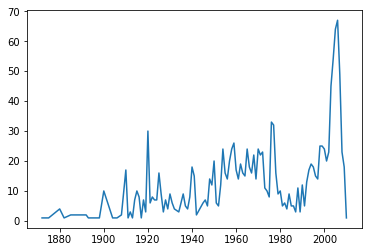

In [1436]:
#Let now look on various data columns / Features visually 
year_sale=housing_df.groupby('YearBuilt').count()
plt.plot(year_sale.Id )

In [1437]:
# Dropping Id as it doesn't contribute towards analysis 
housing_df = housing_df.drop(['Id'], axis=1)
housing_df.shape

(1460, 76)

skew is 1.8828757597682129


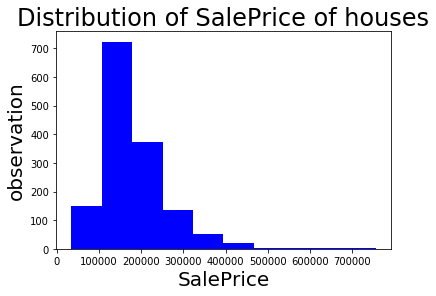

In [1438]:
# Analysing the distribution of SalePrice
print('skew is', housing_df.SalePrice.skew())   
plt.hist(housing_df['SalePrice'], color= 'b')

plt.title('Distribution of SalePrice of houses', fontsize = 24)
plt.ylabel('observation', fontsize = 20)
plt.xlabel('SalePrice', fontsize = 20)

plt.show()

In [1439]:
#log transforming sale price to transform it into gaussian distribution
target = np.log(housing_df.SalePrice)

skew is 0.12133506220520406


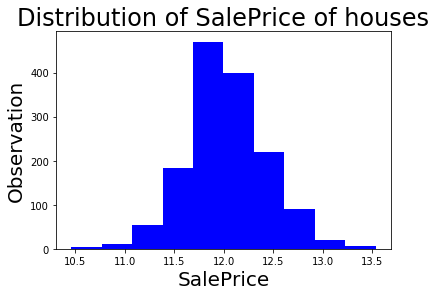

In [1440]:
print('skew is', target.skew())
plt.hist(target, color= 'b')

plt.title('Distribution of SalePrice of houses', fontsize = 24)
plt.ylabel('Observation', fontsize = 20)
plt.xlabel('SalePrice', fontsize = 20)

plt.show()

In [1441]:
#now we will look at the pair wise relationship between various feature
# to achieve this 1st divide the numeric and categorical coulmns 
#numeric df
hosuing_num_df= housing_df._get_numeric_data()
print(hosuing_num_df.columns)
print(len(hosuing_num_df.columns))
print(hosuing_num_df.head())


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
37
   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.

In [1442]:
#categorical df
hosuing_categorical=[i for i in housing_df.columns if housing_df.dtypes[i]=='object']
print(hosuing_categorical)
hosuing_categorical_df= housing_df[hosuing_categorical]
print(len(hosuing_categorical_df.columns))
hosuing_categorical_df.head()


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']
39


MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...      KitchenQual Functional  \
0      CollgCr       Norm       Norm      ...               Gd        Typ   
1      Veenker      Feedr       Norm      ...               TA        Typ   
2      CollgCr       Norm       Norm      ...               Gd        Typ   
3      Crawfor       Norm       Norm      ...               Gd        Typ   
4      NoRidge       Norm       Norm      ...               Gd        Typ   

    FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0  No Fireplace     Attchd          RFn         TA         TA          Y   
1  OK Fireplace     Attchd          RFn         TA         TA          Y   
2  OK Fireplace     Attchd          RFn         TA         TA          Y   
3  OK Fireplace     Detchd          Unf         TA         TA          Y   
4  OK Fireplace     Attchd          RFn         TA         TA          Y   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 39 columns]

<Figure size 1440x720 with 0 Axes>

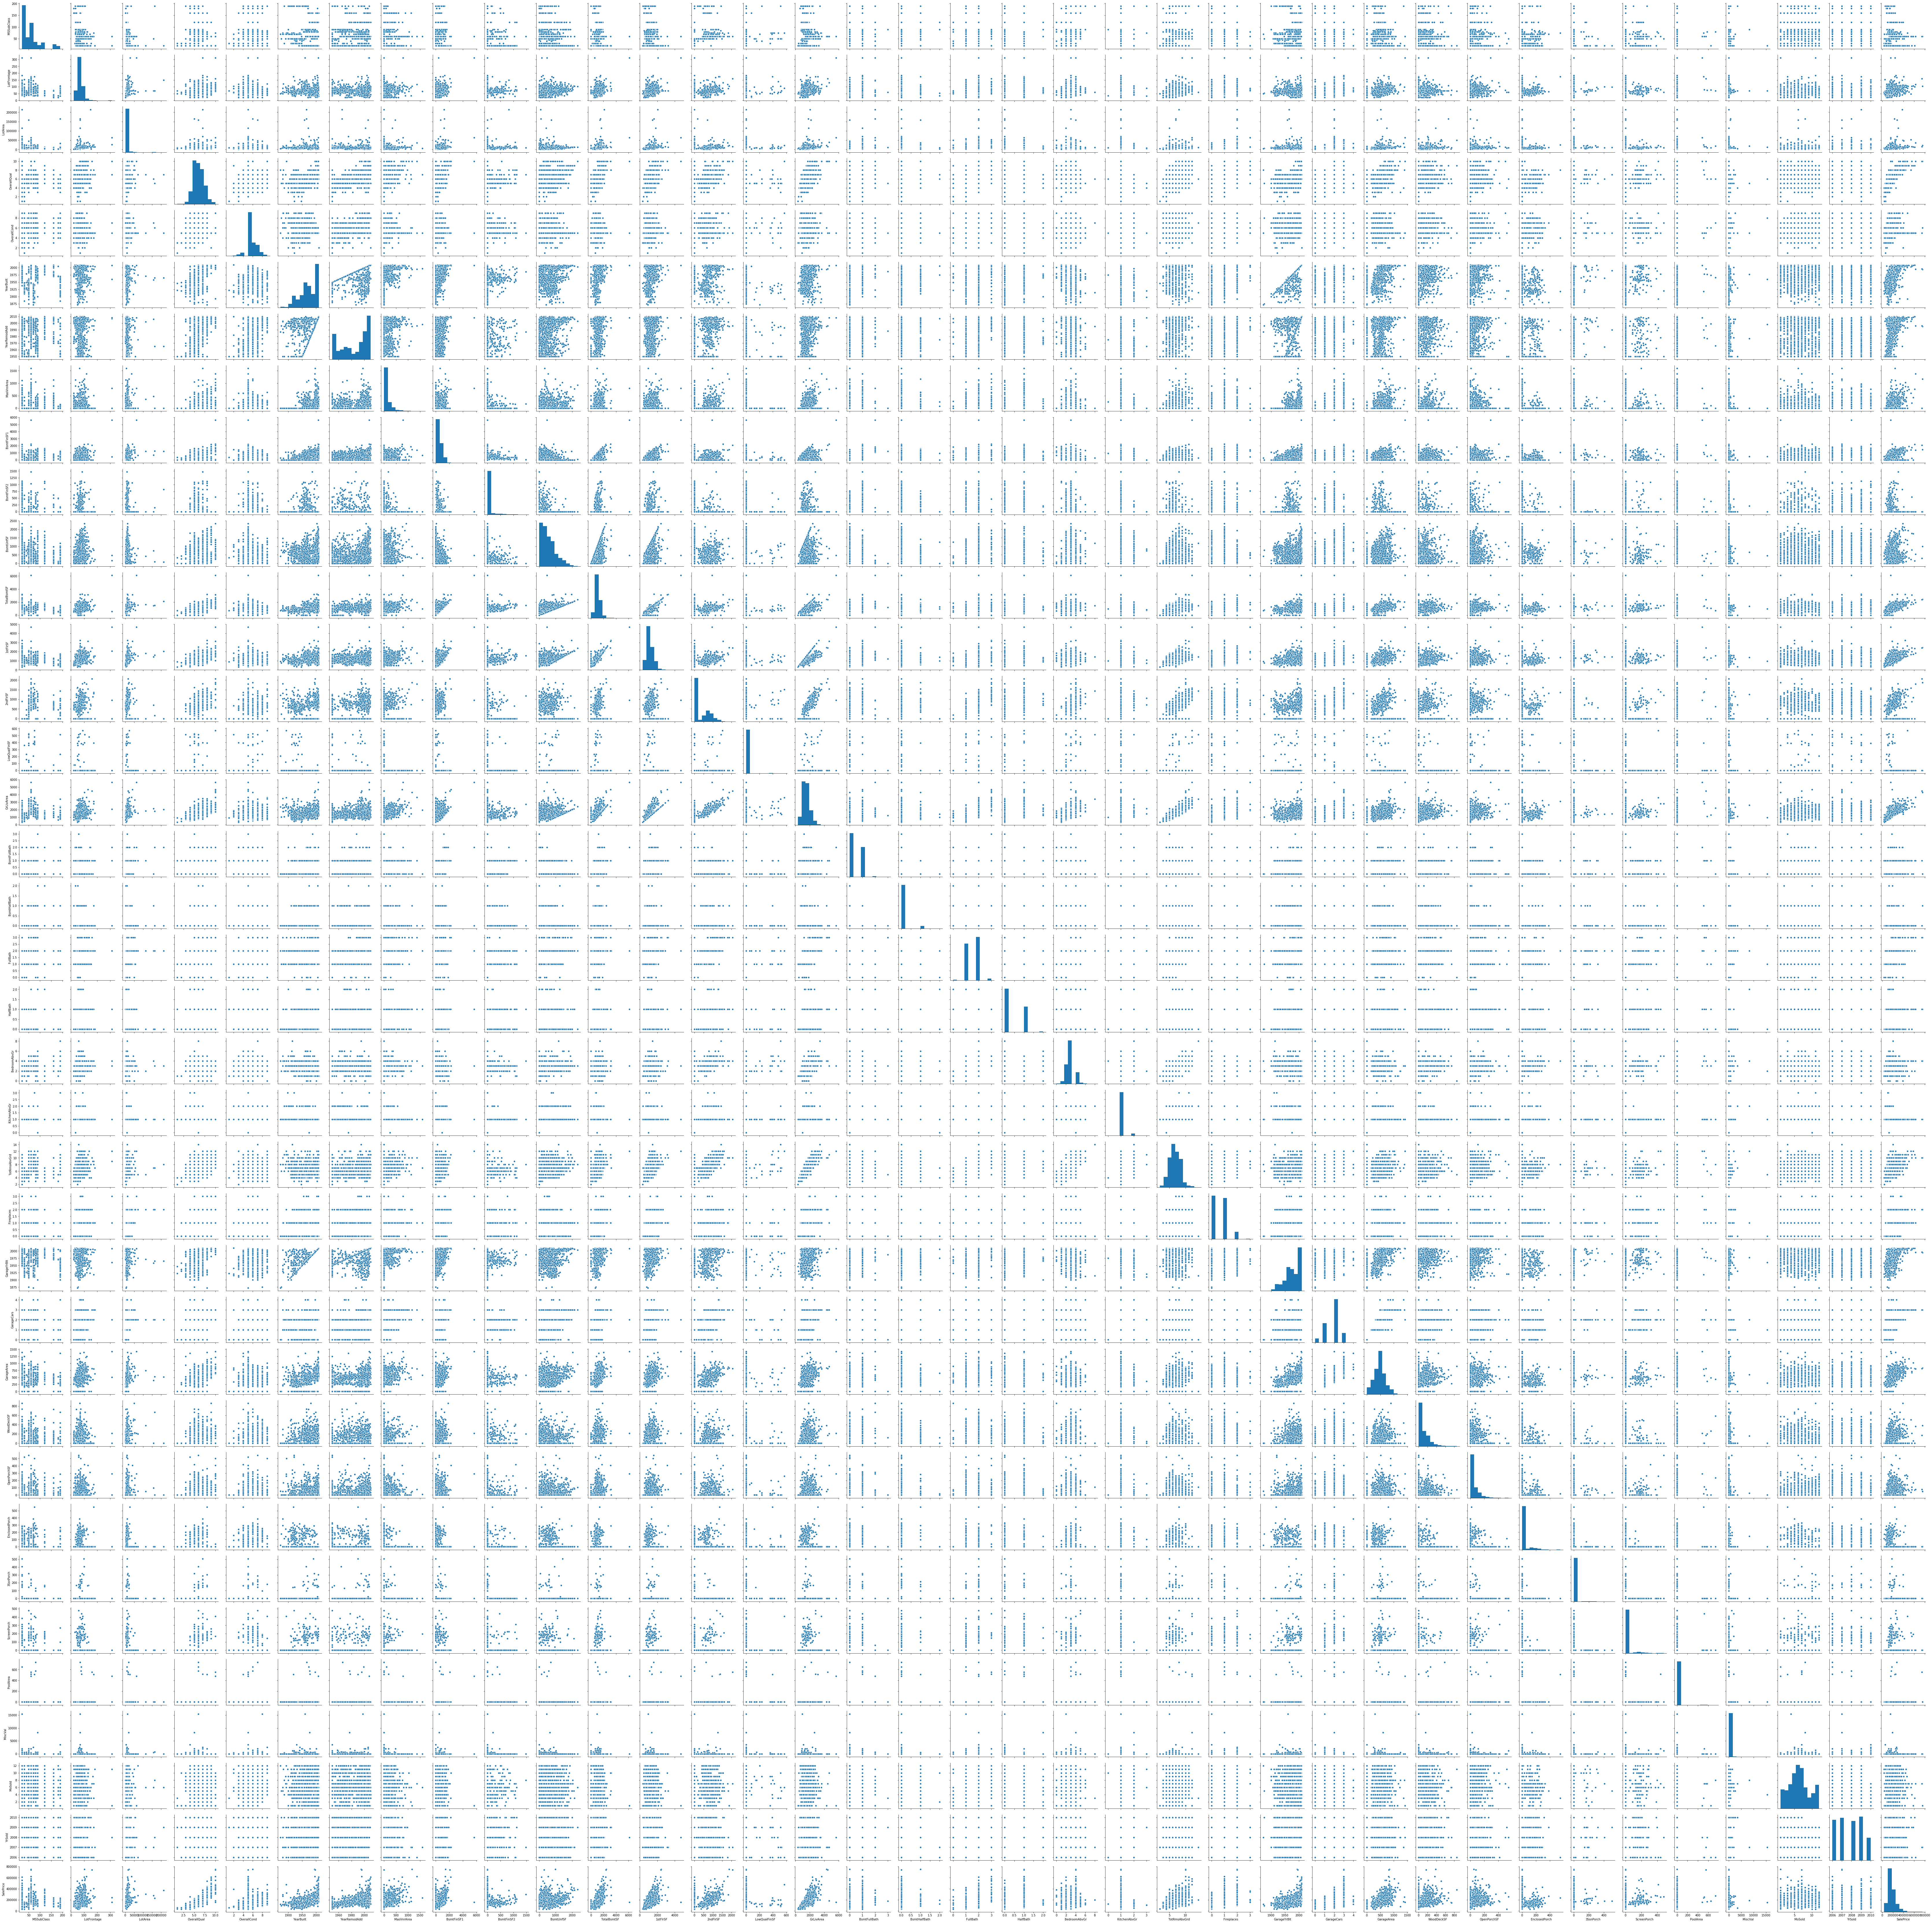

In [1443]:
plt.figure(figsize=(20, 10))      ##remove comments before submission 
sns.pairplot(hosuing_num_df)
plt.show()

In [1444]:
# correlation matrix
cor = hosuing_num_df.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.117598  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.082746  0.013788     0.550684     0.073741   
MasVnrArea       0.022895     0.179283  0.103960     0.410238    -0.127788   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072483  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.036849  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368392  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.091481  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006419  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180424  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.048258  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.237023  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.005805 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320146  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.235755  0.271364     0.396765    -0.023820   
GarageYrBlt      0.039567     0.088746  0.003669     0.555022    -0.296887   
GarageCars      -0.040110     0.269729  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323663  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.077106  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137454  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.009790 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.062335  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037684  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180868  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.001168  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010158  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006768 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334901  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022895   -0.069836   -0.065649   
LotFrontage     0.117598      0.082746    0.179283    0.215828    0.043340   
LotArea         0.014228      0.013788    0.103960    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.410238    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.127788   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.314745    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179186    0.128451   -0.067759   
MasVnrArea      0.314745      0.179186    1.000000    0.263582   -0.072302   
BsmtFinSF1      0.249503      0.128451    0.263582    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072302   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114184   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.362452    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

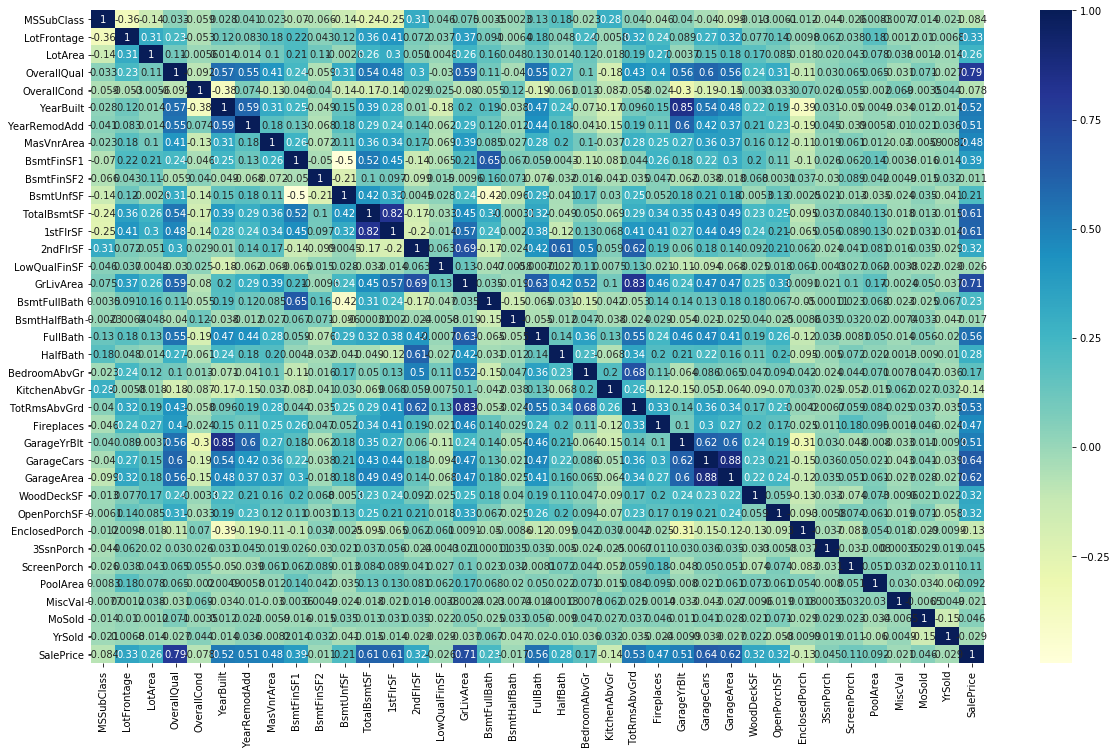

In [1445]:
#visulizating corrections on a heatmap
# figure size
plt.figure(figsize=(20,12))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The Heatmap clearly shows that attributes like OverQual, GrLivArea, GarageCars, GarageArea, FullBath and few other variables clearly have a strong correlation with our dependant variable SalePrice
<br>
We can go ahead and delete the features with high correlation, but the objective is to build a Linear Regression model and after that use lasso which is take care of feature selection and would give us coeffients only for fetaures with are not multi-colinear.

In [1446]:
# Now we must have a visual feel for categorical columns, so lets just explore 
#1stly, let us have a look on uniuqe values for the categorial columns 
#before dummy creation we must have an idea on the unique values of features
hosuing_categorical_df.nunique().sort_values(ascending =True)

Street            2
Utilities         2
FireplaceQu       2
CentralAir        2
LandSlope         3
PavedDrive        3
GarageFinish      4
LotShape          4
LandContour       4
ExterQual         4
KitchenQual       4
BsmtCond          5
BsmtQual          5
HeatingQC         5
ExterCond         5
MasVnrType        5
MSZoning          5
BsmtExposure      5
BldgType          5
LotConfig         5
GarageQual        6
GarageCond        6
Electrical        6
Heating           6
Foundation        6
RoofStyle         6
SaleCondition     6
BsmtFinType1      7
Functional        7
GarageType        7
BsmtFinType2      7
RoofMatl          8
HouseStyle        8
Condition2        8
SaleType          9
Condition1        9
Exterior1st      15
Exterior2nd      16
Neighborhood     25
dtype: int64

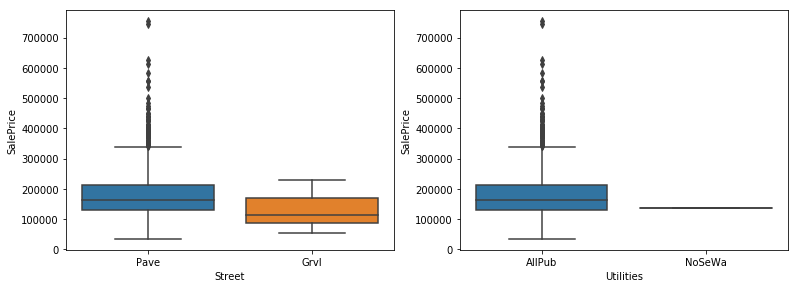

In [1447]:
#Plotting the categorical variables related street and  Utilities
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing_df)

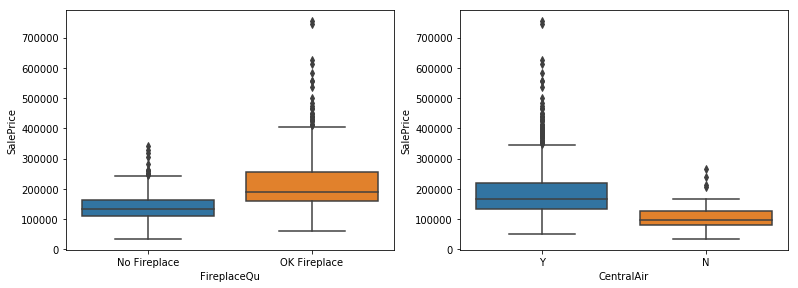

In [1448]:
#Plotting the categorical variables related FireplaceQu and  CentralAir
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'FireplaceQu', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = housing_df)

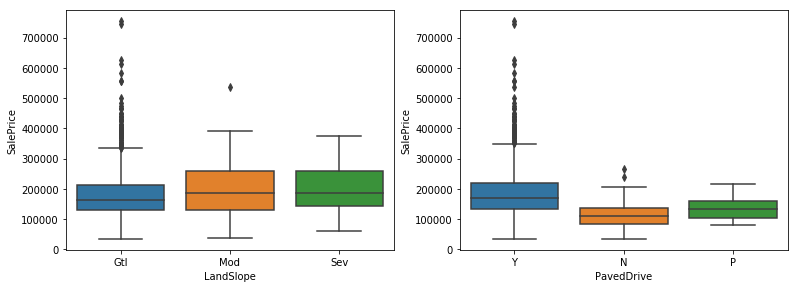

In [1449]:
#Plotting the categorical variables related LandSlope and  PavedDrive
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = housing_df)

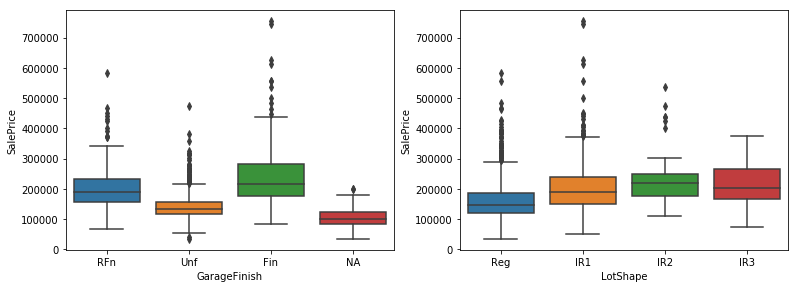

In [1450]:
#Plotting the categorical variables related GarageFinish and  PavedDrive
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = housing_df)

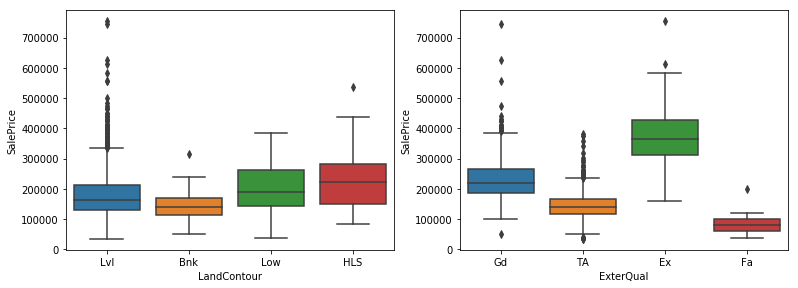

In [1451]:
#Plotting the categorical variables related LandContour and  ExterQual
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = housing_df)

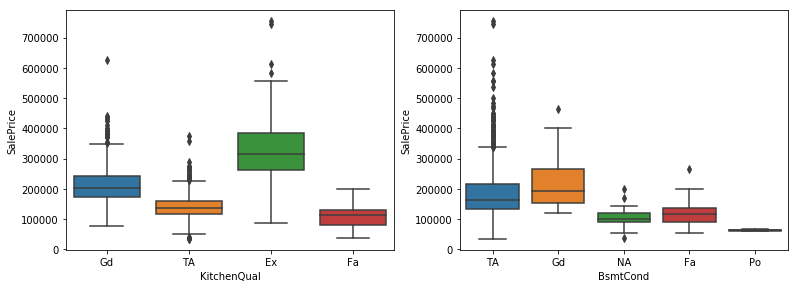

In [1452]:
#Plotting the categorical variables related KitchenQual and  BsmtCond
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = housing_df)

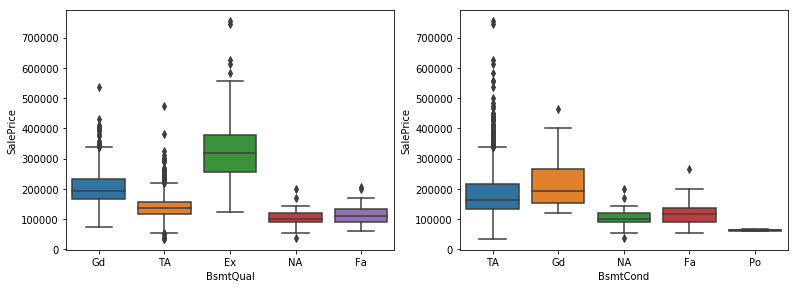

In [1453]:

#Plotting the categorical variables related BsmtQual and  HeatingQC
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = housing_df)

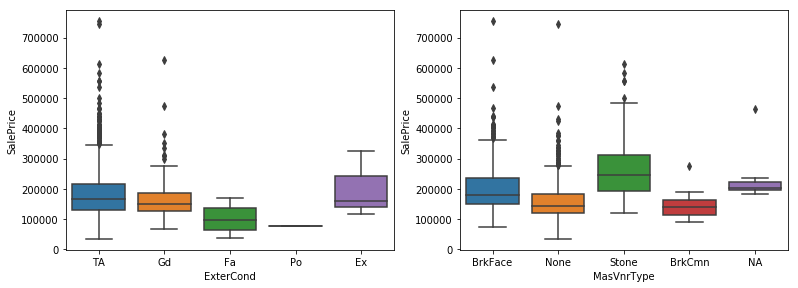

In [1454]:

#Plotting the categorical variables related ExterCond and  MasVnrType
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = housing_df)

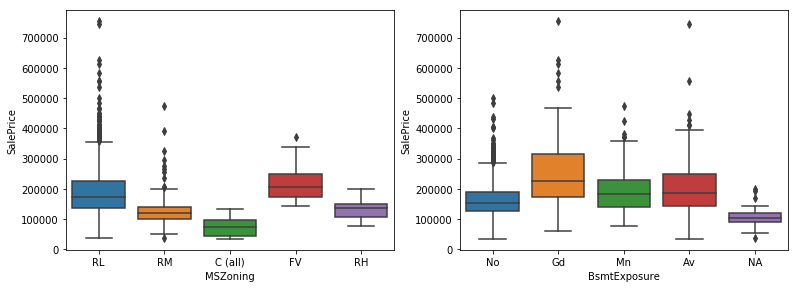

In [1455]:
#Plotting the categorical variables related MSZoning and  BsmtExposure
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = housing_df)

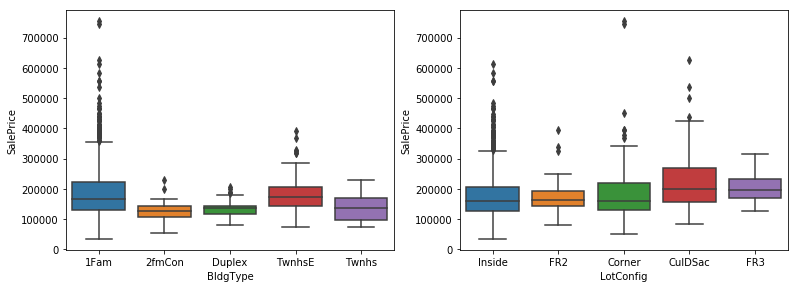

In [1456]:
#Plotting the categorical variables related BldgType and  LotConfig
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = housing_df)

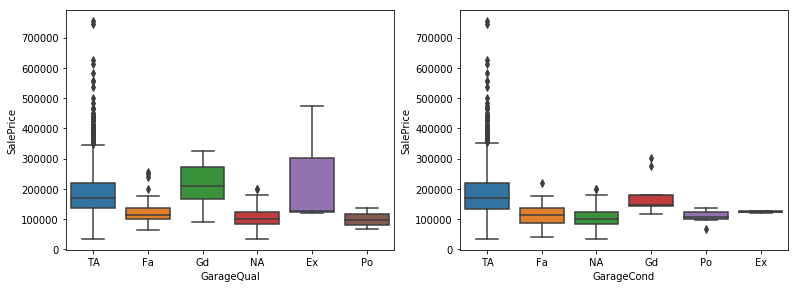

In [1457]:
#Plotting the categorical variables related GarageQual and  GarageCond
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = housing_df)

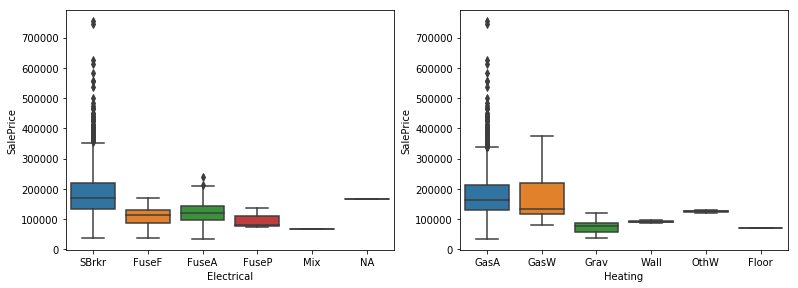

In [1458]:
#Plotting the categorical variables related Electrical and  Heating
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing_df)

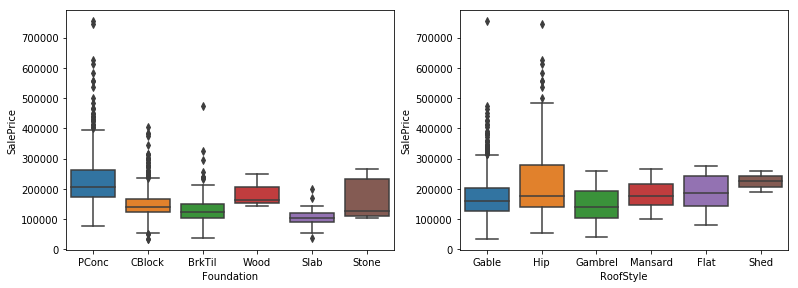

In [1459]:
#Plotting the categorical variables related Electrical and  RoofStyle
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing_df)

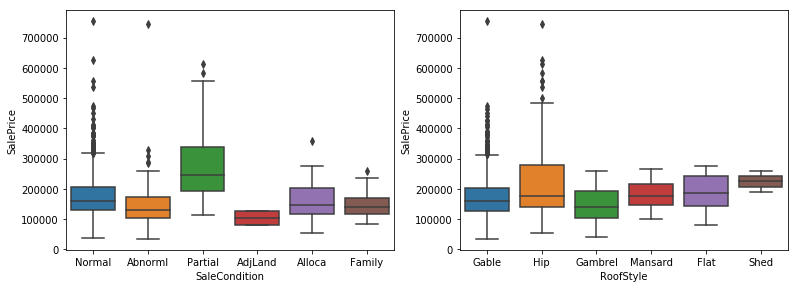

In [1460]:
#Plotting the categorical variables related SaleCondition and  BsmtFinType1
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = housing_df)

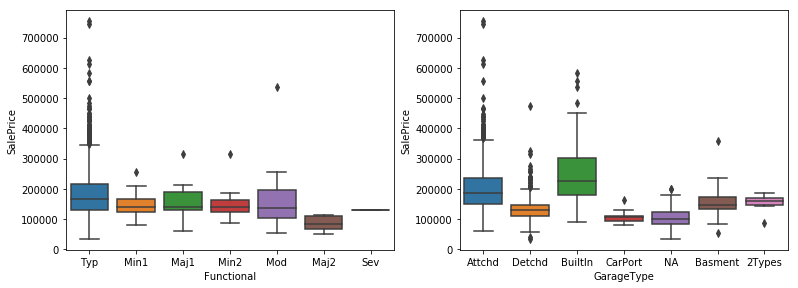

In [1461]:
#Plotting the categorical variables related Functional and  GarageType
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = housing_df)

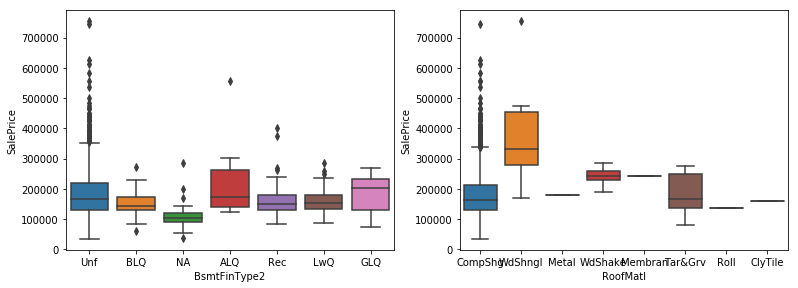

In [1462]:
#Plotting the categorical variables related BsmtFinType2 and  RoofMatl
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = housing_df)

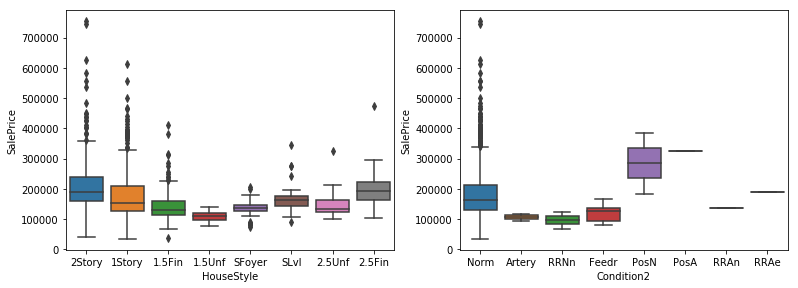

In [1463]:
#Plotting the categorical variables related HouseStyle and  Condition2
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = housing_df)

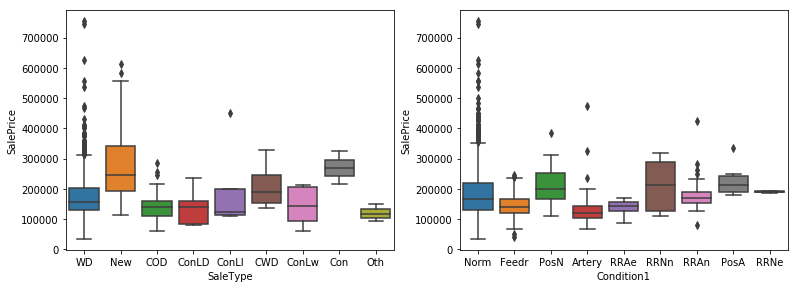

In [1464]:
#Plotting the categorical variables related SaleType and  Condition1
plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = housing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing_df)

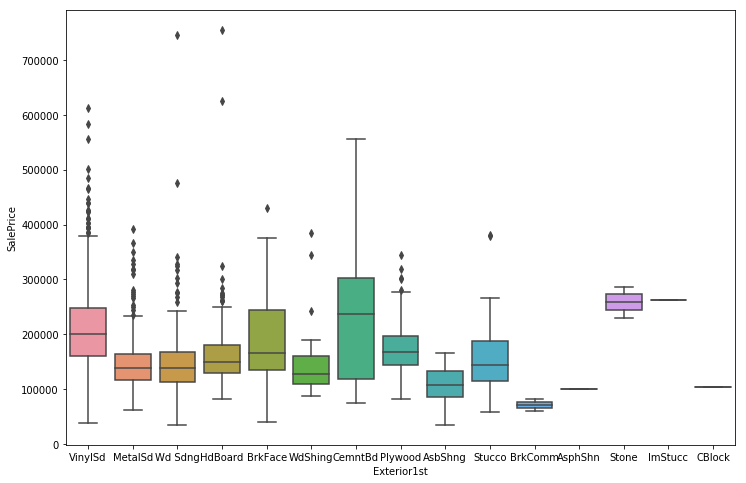

In [1465]:
#Plotting the categorical variables related Exterior1st
plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = housing_df)

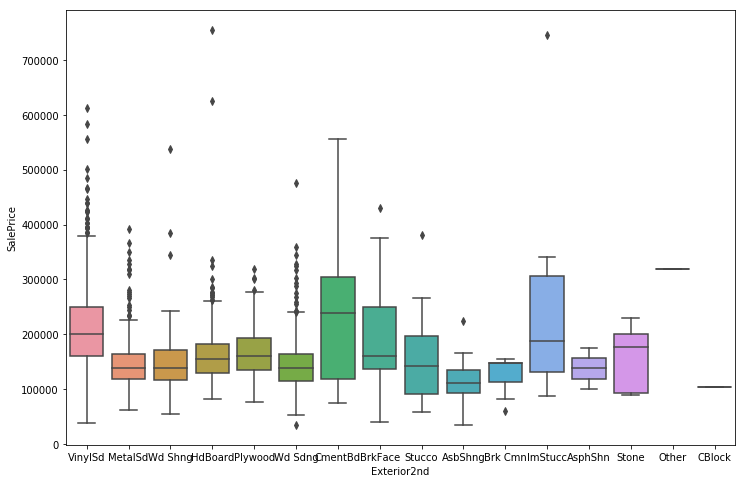

In [1466]:

#Plotting the categorical variables related Exterior2nd 
plt.figure(figsize=(12,8))
plt.subplot(1,1,1)
sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = housing_df)

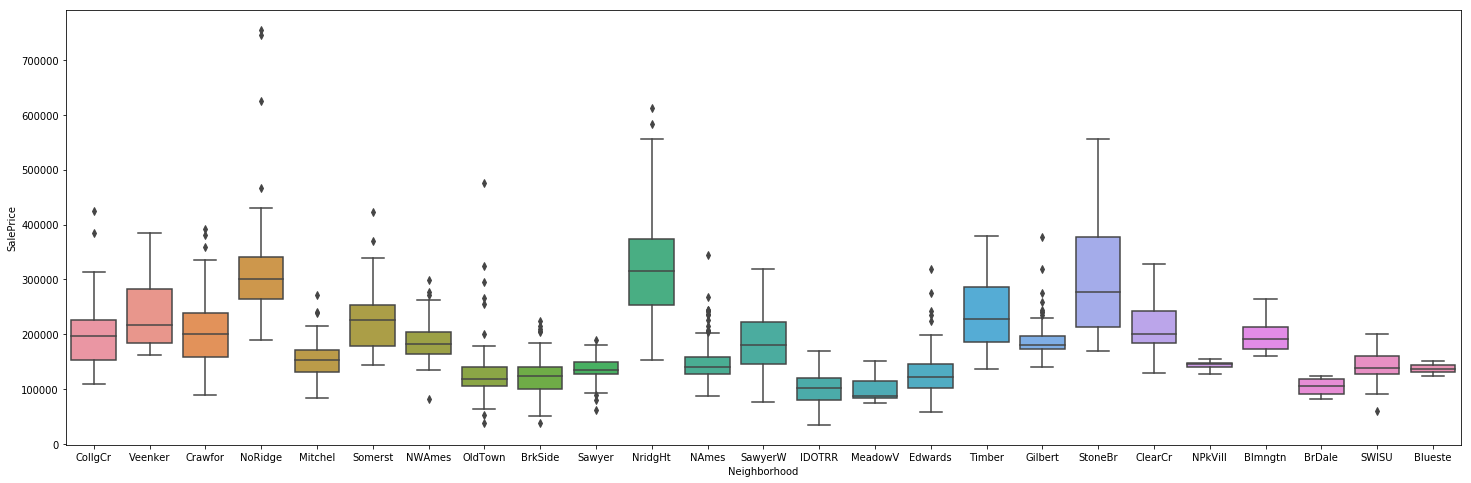

In [1467]:
#Plotting the categorical variables related Neighborhood
plt.figure(figsize=(25,8))
plt.subplot(1,1,1)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing_df)

I have not done outlier treatment as the SalePrice and the feature may have outliers on indivisual basis, but as multiple 
features cpntibute towards the price, thus cant comment on the outlier with centainity.

Now its time for some univariate analysis on of assume key predictors and our target variable 

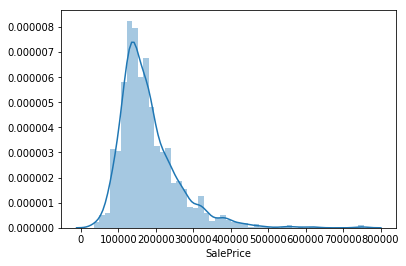

In [1468]:
#let us have a look on target variable: SalePrice and its distribution 
sns.distplot(housing_df['SalePrice'])
plt.show()


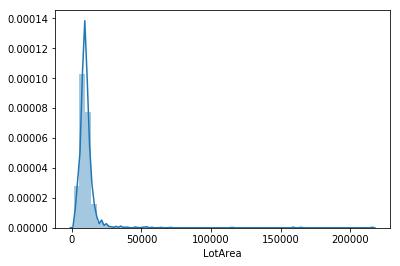

In [1469]:
# let us have a look on predictor variable: LotArea (Lot size in square feet) and its distribution 
sns.distplot(housing_df['LotArea'])
plt.show()

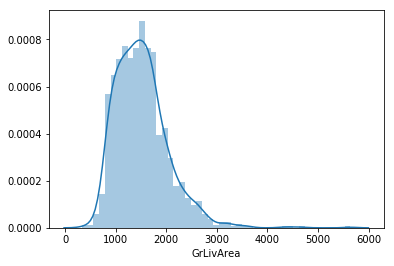

In [1470]:
# let us have a look on predictor variable: GrLivArea(Above grade (ground) living area square feet) and its distribution
sns.distplot(housing_df['GrLivArea'])
plt.show()
#We can see that its mostly a Normally distributed but slightly have bimodal

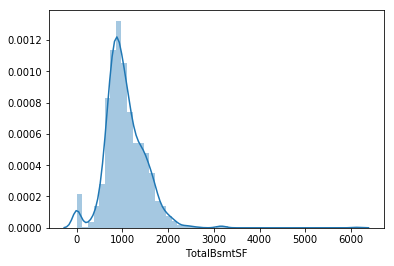

In [1471]:
# let us have a look on predictor variable: TotalBsmtSF (Total square feet of basement area) and its distribution
sns.distplot(housing_df['TotalBsmtSF'])
plt.show()

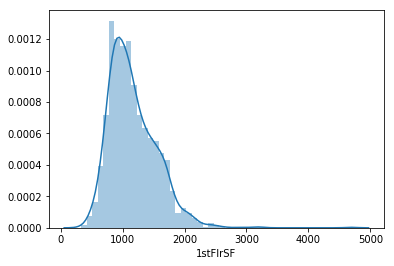

In [1472]:
# let us have a look on predictor variable: 1stFlrSF (First Floor square feet)
sns.distplot(housing_df['1stFlrSF'])
plt.show()
#We can see that its mostly a Normally distributed but slightly have bimodal

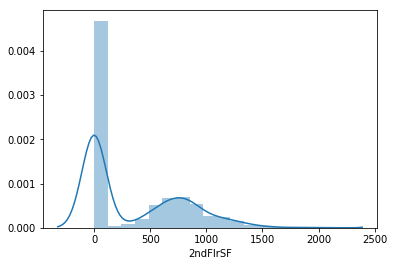

In [1473]:
# let us have a look on predictor variable: 2ndFlrSF (Second floor square feet) and its distribution
sns.distplot(housing_df['2ndFlrSF'])
plt.show()

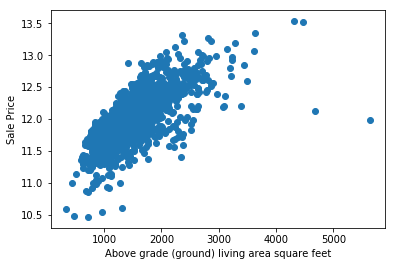

In [1474]:

#Analysing the feature - ground living area 
plt.scatter(x = housing_df['GrLivArea'], y = target)

plt.xlabel('Above grade (ground) living area square feet')
plt.ylabel('Sale Price')
plt.show()

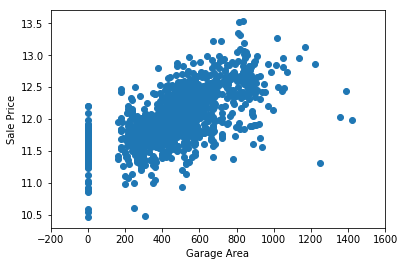

In [1475]:

plt.scatter(x = housing_df['GarageArea'], y = np.log(housing_df.SalePrice))

plt.xlim(-200, 1600)
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.show()

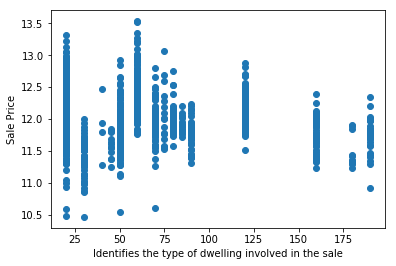

In [1476]:
#Analysing the feature - MSSubClass
plt.scatter(x = housing_df['MSSubClass'], y = target)

plt.xlabel('Identifies the type of dwelling involved in the sale')
plt.ylabel('Sale Price')
plt.show()

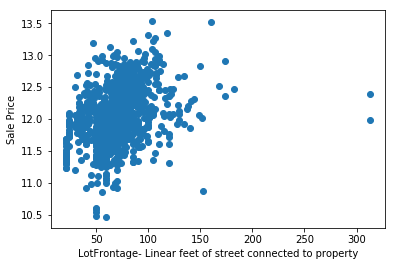

In [1477]:
#Analysing the feature - LotFrontage
plt.scatter(x = housing_df['LotFrontage'], y = target)

plt.xlabel('LotFrontage- Linear feet of street connected to property')
plt.ylabel('Sale Price')
plt.show()

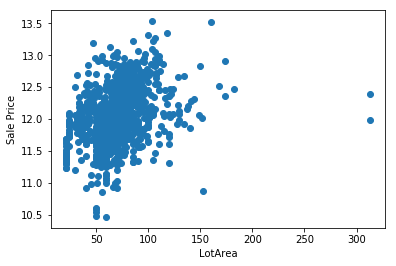

In [1478]:
#Analysing the feature - LotArea
plt.scatter(x = housing_df['LotFrontage'], y = target)
plt.xlabel('LotArea')
plt.ylabel('Sale Price')
plt.show()

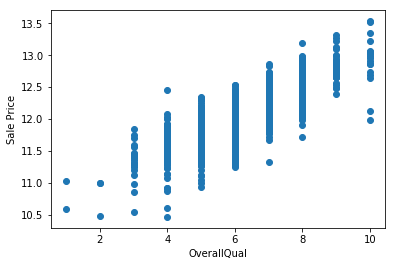

In [1479]:
#Analysing the feature - OverallQual
plt.scatter(x = housing_df['OverallQual'], y = target)
plt.xlabel('OverallQual')
plt.ylabel('Sale Price')
plt.show()

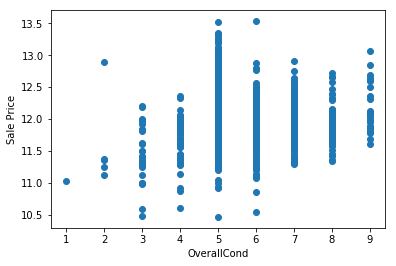

In [1480]:
#Analysing the feature - OverallCond
plt.scatter(x = housing_df['OverallCond'], y = target)
plt.xlabel('OverallCond')
plt.ylabel('Sale Price')
plt.show()

In [1481]:
#Lets have a deeper look on Year Built
#Using the concept of Binning for the Year built variable
#Creating bins of year periods - 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1925,1950,1976,1991,2001,2010]
slot_years=['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
housing_df['YearBuilt']=pd.cut(housing_df['YearBuilt'],bins,labels=slot_years,include_lowest=True)
print(100*(housing_df['YearBuilt'].value_counts()/housing_df['YearBuilt'].count()))

1950-1975    31.027397
2001-2010    23.561644
1991-2000    13.013699
1925-1950    12.054795
1872-1925    11.095890
1976-1990     9.246575
Name: YearBuilt, dtype: float64


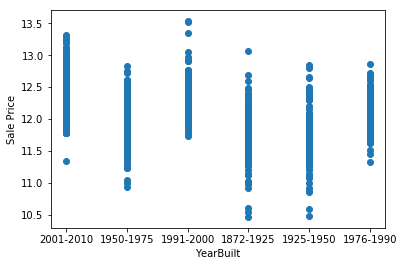

In [1482]:
#Analysing the feature - YearBuilt
plt.scatter(x = housing_df['YearBuilt'], y = target)
plt.xlabel('YearBuilt')
plt.ylabel('Sale Price')
plt.show()

In [1483]:

#Lets have a deeper look on YearRemodAdd variable
##Using the concept of  Binning of the YearRemodAdd variable
#Creating bins of year periods as 1872-1925, 1925-1950,1950-1975, 1976-1990, 1991-2000,2001-2010
bins=[1872,1950,1976,1991,2001,2010]
slot_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
housing_df['YearRemodAdd']=pd.cut(housing_df['YearRemodAdd'],bins,labels=slot_names,include_lowest=True)
100*(housing_df['YearRemodAdd'].value_counts()/housing_df['YearRemodAdd'].count())

2001-2010    32.602740
1950-1975    24.041096
1991-2000    20.000000
1872-1950    12.191781
1976-1990    11.164384
Name: YearRemodAdd, dtype: float64

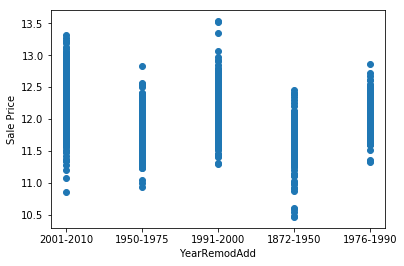

In [1484]:

#Analysing the feature - YearRemodAdd
plt.scatter(x = housing_df['YearRemodAdd'], y = target)
plt.xlabel('YearRemodAdd')
plt.ylabel('Sale Price')
plt.show()

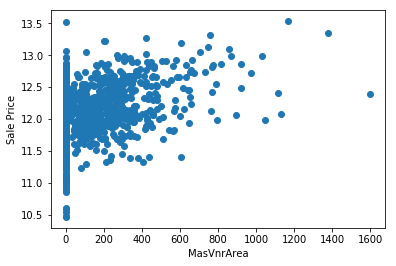

In [1485]:
#Analysing the feature - MasVnrArea
plt.scatter(x = housing_df['MasVnrArea'], y = target)
plt.xlabel('MasVnrArea')
plt.ylabel('Sale Price')
plt.show()

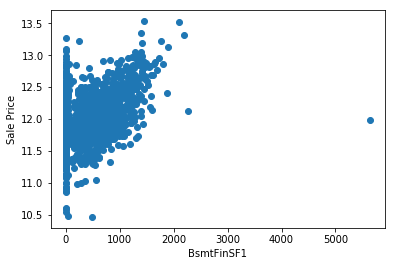

In [1486]:
#Analysing the feature - BsmtFinSF1
plt.scatter(x = housing_df['BsmtFinSF1'], y = target)
plt.xlabel('BsmtFinSF1')
plt.ylabel('Sale Price')
plt.show()

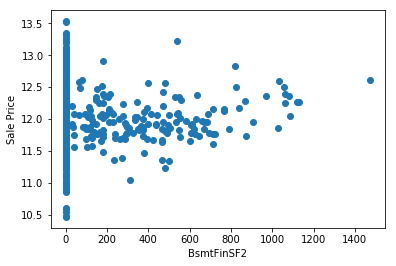

In [1487]:
#Analysing the feature - BsmtFinSF2
plt.scatter(x = housing_df['BsmtFinSF2'], y = target)
plt.xlabel('BsmtFinSF2')
plt.ylabel('Sale Price')
plt.show()

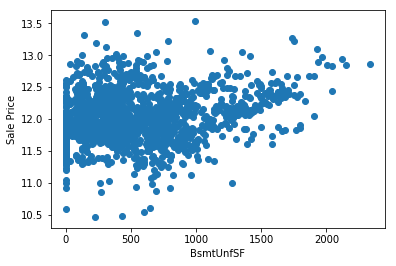

In [1488]:
#Analysing the feature - BsmtUnfSF
plt.scatter(x = housing_df['BsmtUnfSF'], y = target)
plt.xlabel('BsmtUnfSF')
plt.ylabel('Sale Price')
plt.show()

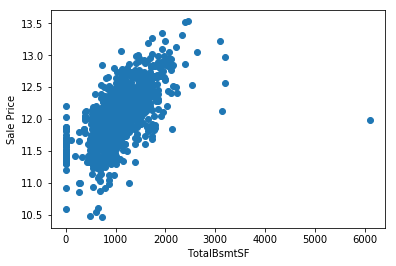

In [1489]:
#Analysing the feature - TotalBsmtSF
plt.scatter(x = housing_df['TotalBsmtSF'], y = target)
plt.xlabel('TotalBsmtSF')
plt.ylabel('Sale Price')
plt.show()


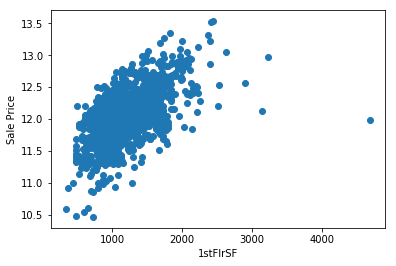

In [1490]:
#Analysing the feature - 1stFlrSF
plt.scatter(x = housing_df['1stFlrSF'], y = target)
plt.xlabel('1stFlrSF')
plt.ylabel('Sale Price')
plt.show()

Text(0, 0.5, 'Sale Price')

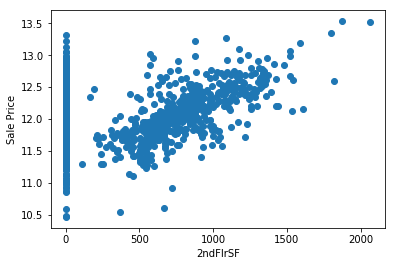

In [1491]:
#Analysing the feature - 2ndFlrSF
plt.scatter(x = housing_df['2ndFlrSF'], y = target)
plt.xlabel('2ndFlrSF')
plt.ylabel('Sale Price')
#plt.show()


### Outlier treatment
I'm not working towards the outliers because as per my business understanding in the domain of house, there are quite a number of properties which gives extra attention to the the features that they provide along the hosue so as to increase the value of the property, to explain better if we have a standard apartment than every thing is of a generic size but to add on to the value of the property builders or the property owner gives more attention to ceratin features depending on the area and budget they have. So if we consider them outlier than we are with handlling information which might give model a better understanding 

As we can visully see  that most of the pridector variables have a linear sort of relationship with the target variable

### Data Prep - Modeling 

In [1492]:
# Dummy creation 
# first have look on the categorical dataframe 
hosuing_categorical_df.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...      KitchenQual Functional  \
0      CollgCr       Norm       Norm      ...               Gd        Typ   
1      Veenker      Feedr       Norm      ...               TA        Typ   
2      CollgCr       Norm       Norm      ...               Gd        Typ   
3      Crawfor       Norm       Norm      ...               Gd        Typ   
4      NoRidge       Norm       Norm      ...               Gd        Typ   

    FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0  No Fireplace     Attchd          RFn         TA         TA          Y   
1  OK Fireplace     Attchd          RFn         TA         TA          Y   
2  OK Fireplace     Attchd          RFn         TA         TA          Y   
3  OK Fireplace     Detchd          Unf         TA         TA          Y   
4  OK Fireplace     Attchd          RFn         TA         TA          Y   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 39 columns]

In [1493]:
housing_dummies = pd.get_dummies(hosuing_categorical_df, drop_first=True)
housing_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 208 columns]

In [1494]:
#Now concatinting the categorical df with numeric df
model_df = pd.concat([hosuing_num_df, housing_dummies], axis=1)

In [1495]:
model_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2          ...            \
0          2003       196.0         706           0          ...             
1          1976         0.0         978           0          ...             
2          2002       162.0         486           0          ...             
3          1970         0.0         216           0          ...             
4          2000       350.0         655           0          ...             

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0               0             0             0            1   
1               0               0             0             0            1   
2               0               0             0             0            1   
3               0               0             0             0            1   
4               0               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 245 columns]

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split. Deviding train and test data in ratio of 70:30

In [1534]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(model_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1535]:
#check the shape and content of the newly cretaed train and test dataframe
print(df_test.shape)
print(df_train.shape)



(438, 245)
(1021, 245)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model.  it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

 we will use MinMax scaling.

In [1536]:
numeric_var= housing_df._get_numeric_data().columns

In [1537]:
scaler = MinMaxScaler()

In [1538]:
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

In [1539]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1540]:
# linear regression
lmlr = LinearRegression()
lmlr.fit(X_train, y_train)

# predict
y_train_pred = lmlr.predict(X_train)
skl.r2_score(y_true=y_train, y_pred=y_train_pred)


0.9491563905393916

In [1541]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
col = X_train.columns[rfe.support_]
global X_train_rfe 
X_train_rfe = X_train[col]
def P_Val_VIF_Val(X_train_rfe):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    global lm_model
    lm_model = lm
    print(lm.summary())
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_rfe
    X.drop('const',axis=1,inplace= True)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [1542]:
P_Val_VIF_Val(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     302.7
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        20:35:49   Log-Likelihood:                 1804.3
No. Observations:                1021   AIC:                            -3567.
Df Residuals:                    1000   BIC:                            -3463.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.1948      0.049  

From above we can see the basic model using linear regrssion, we can seen that there are a lot of features with very high multicolineity, as we know that lasso eleimates the multicolinearity so going ahead with lasso to check the featurs

In [1543]:
print(X_train_rfe.columns)

Index(['LotFrontage', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW',
       'Functional_Sev'],
      dtype='object')


Text(0.5, 0, 'Errors')

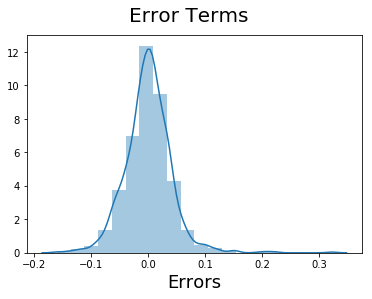

In [1544]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [1545]:
df_test[numeric_var] = scaler.transform(df_test[numeric_var])
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1546]:
print((X_train_rfe.shape))

(1021, 20)


In [1547]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1550]:
# Making predictions
y_pred = lm_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

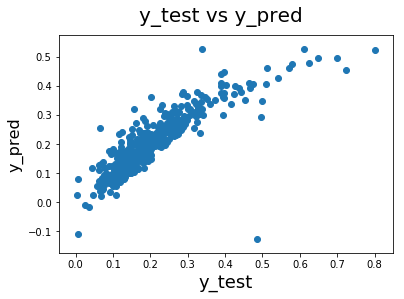

In [1551]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1552]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7380861649197945

In [1553]:
mse = mean_squared_error(y_pred, y_test)
r_squared = r2_score(y_pred, y_test)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0032504949341802753
r_square_value : 0.6727252013311177


In [1554]:
#Now we must also look at the RFE selection and let us find out the outcomes
# Running RFE with the output number of the variable equal to 20
lmrfe = LinearRegression()
lmrfe.fit(X_train, y_train)

rfe = RFE(lmrfe, 20)             # running RFE for 20 varibales 
rfe = rfe.fit(X_train, y_train)

In [1555]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'Condition2_PosN', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Heating_OthW',
       'Functional_Sev'],
      dtype='object')

In [1556]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 52),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 5),
 ('YearBuilt', False, 210),
 ('YearRemodAdd', False, 220),
 ('MasVnrArea', False, 10),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 19),
 ('BsmtUnfSF', False, 18),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 17),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 66),
 ('BsmtHalfBath', False, 203),
 ('FullBath', False, 95),
 ('HalfBath', False, 182),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 174),
 ('Fireplaces', False, 136),
 ('GarageYrBlt', False, 7),
 ('GarageCars', False, 58),
 ('GarageArea', False, 135),
 ('WoodDeckSF', False, 163),
 ('OpenPorchSF', False, 117),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 107),
 ('ScreenPorch', False, 160),
 ('PoolArea', False, 9),
 ('MiscVal', False, 104),
 ('MoSold', False, 196),
 ('YrSold', False, 181),
 ('MS

In [1557]:
# predict
y_train_pred = lmrfe.predict(X_train)
skl.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9491563905393916

In [1558]:
mse = mean_squared_error(y_pred, y_test)
r_squared = r2_score(y_pred, y_test)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.0032504949341802753
r_square_value : 0.6727252013311177


In [1559]:
# Now as a part of different models to choose from, lets check the outcomes using lasso regression
lmlasso = Lasso(alpha=.001)  # arbiture value
lmlasso.fit(X_train, y_train)

# predict
y_train_pred = lmlasso.predict(X_train)
print(skl.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmlasso.predict(X_test)
print(skl.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8260195727437272
0.8064407939254159


In [1560]:
# lasso model parameters
model_parameters = list(lmlasso.coef_)
model_parameters.insert(0, lmlasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -1.854),
 ('MSSubClass', -0.028),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('OverallQual', 0.158),
 ('OverallCond', 0.0),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.001),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.239),
 ('BsmtFullBath', 0.006),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('TotRmsAbvGrd', 0.013),
 ('Fireplaces', 0.0),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.049),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.0),
 ('YrSold', -0.0),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', -0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.007),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 

Feauters and coefficient using lasso
[('constant', -1.854),
 ('MSSubClass', -0.028),
 ('OverallQual', 0.158),
 ('GrLivArea', 0.239),
 ('BsmtFullBath', 0.006),
 ('TotRmsAbvGrd', 0.013),
 ('GarageCars', 0.049),
 ('Neighborhood_Crawfor', 0.014),
 ('Neighborhood_Edwards', -0.006),
 ('Neighborhood_NoRidge', 0.059),
 ('Neighborhood_NridgHt', 0.028),
 ('Condition1_Norm', 0.007),
 ('RoofStyle_Gable', -0.005),
 ('ExterQual_TA', -0.012),
 ('BsmtExposure_Gd', 0.033),
 ('BsmtFinType1_GLQ', 0.011),
 ('KitchenQual_Gd', -0.016),
 ('KitchenQual_TA', -0.018),
 ('FireplaceQu_OK Fireplace', 0.021),
 ('GarageType_Attchd', 0.002),
 ('GarageFinish_Unf', -0.003),
 ('SaleType_New', 0.007),


#Now to get the optimal value of alpha using grid search method 

In [1519]:
# grid search CV

# set up cross validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
params = {'alpha': [0.0001,0.001, 0.01, 1.0, 5.0, 10.0,100.0,1000.0]}

# grid search
# lasso model
model = Lasso()
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 5.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [1563]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.084605      0.063463           0.0054        0.002417      0.0001   
1       0.022401      0.002059           0.0030        0.000632       0.001   
2       0.024801      0.001600           0.0038        0.000400        0.01   
3       0.026602      0.003774           0.0040        0.001095        0.05   
4       0.028202      0.004665           0.0034        0.000490         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.025782          -0.028545          -0.028642   
1   {'alpha': 0.001}          -0.025702          -0.028526          -0.028593   
2    {'alpha': 0.01}          -0.025512          -0.028358          -0.028532   
3    {'alpha': 0.05}          -0.026285          -0.028010          -0.029314   
4     {'alpha': 0.1}          -0.026689          -0.027911          -0.030011   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.029276       ...               -0.027567        0.001555   
1          -0.029094       ...               -0.027482        0.001550   
2          -0.027804       ...               -0.027046        0.001477   
3          -0.026185       ...               -0.027278        0.001210   
4          -0.025644       ...               -0.027658        0.001466   

   rank_test_score  split0_train_score  split1_train_score  \
0               14           -0.016359           -0.015936   
1               12           -0.016369           -0.015934   
2                9           -0.016596           -0.015920   
3               11           -0.017931           -0.015946   
4               17           -0.018776           -0.016012   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.016582           -0.016893           -0.016104   
1           -0.016574           -0.016890           -0.016112   
2           -0.016706           -0.016932           -0.016394   
3           -0.017877           -0.017911           -0.017780   
4           -0.018622           -0.018809           -0.018689   

   mean_train_score  std_train_score  
0         -0.016375         0.000340  
1         -0.016376         0.000337  
2         -0.016510         0.000342  
3         -0.017489         0.000773  
4         -0.018182         0.001087  

[5 rows x 21 columns]

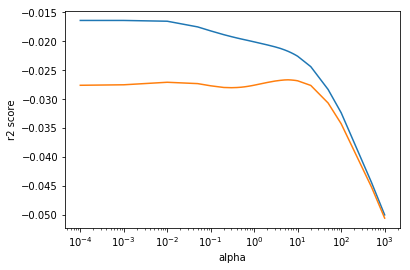

In [1564]:
# plotting the value of alpha and r2 score to get the optimal value of alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.xscale('log')
plt.show()

from above representation we ca  the optimal value of alpha is 10^-3 i.e. this show that this is low level regularization

In [1569]:
# model with optimal alpha
# lasso regression
lmlasso = Lasso(alpha=.001)
lmlasso.fit(X_train, y_train)

# predict
y_train_pred = lmlasso.predict(X_train)
print(skl.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmlasso.predict(X_test)
print(skl.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9054028244561074
0.8570937432278538


In [1570]:
# lasso model parameters
model_parameters = list(lmlasso.coef_)
model_parameters.insert(0, lmlasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.917),
 ('MSSubClass', -0.033),
 ('LotFrontage', -0.0),
 ('LotArea', 0.045),
 ('OverallQual', 0.118),
 ('OverallCond', 0.045),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.03),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.003),
 ('TotalBsmtSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.04),
 ('LowQualFinSF', -0.017),
 ('GrLivArea', 0.344),
 ('BsmtFullBath', 0.034),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.023),
 ('HalfBath', 0.0),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.018),
 ('TotRmsAbvGrd', 0.0),
 ('Fireplaces', 0.002),
 ('GarageYrBlt', 0.0),
 ('GarageCars', 0.054),
 ('GarageArea', 0.0),
 ('WoodDeckSF', 0.01),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.005),
 ('PoolArea', -0.0),
 ('MiscVal', -0.0),
 ('MoSold', -0.001),
 ('YrSold', -0.003),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.007),
 ('MSZoning_RM', -0.0),
 ('Street_Pave', 0.0),
 ('LotShape_IR2', 0.001),
 ('

In [1571]:
#Now using ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    4.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1572]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.066804      0.035770           0.0034        0.001020      0.0001   
1       0.026602      0.002577           0.0042        0.002040       0.001   
2       0.026602      0.002245           0.0036        0.000800        0.01   
3       0.030402      0.002800           0.0046        0.000800        0.05   
4       0.030602      0.001744           0.0040        0.000633         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.025782          -0.028545          -0.028642   
1   {'alpha': 0.001}          -0.025702          -0.028526          -0.028593   
2    {'alpha': 0.01}          -0.025512          -0.028358          -0.028532   
3    {'alpha': 0.05}          -0.026285          -0.028010          -0.029314   
4     {'alpha': 0.1}          -0.026689          -0.027911          -0.030011   

   split3_test_score       ...         mean_test_score  std_test_score  \
0          -0.029276       ...               -0.027567        0.001555   
1          -0.029094       ...               -0.027482        0.001550   
2          -0.027804       ...               -0.027046        0.001477   
3          -0.026185       ...               -0.027278        0.001210   
4          -0.025644       ...               -0.027658        0.001466   

   rank_test_score  split0_train_score  split1_train_score  \
0               14           -0.016359           -0.015936   
1               12           -0.016369           -0.015934   
2                9           -0.016596           -0.015920   
3               11           -0.017931           -0.015946   
4               17           -0.018776           -0.016012   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.016582           -0.016893           -0.016104   
1           -0.016574           -0.016890           -0.016112   
2           -0.016706           -0.016932           -0.016394   
3           -0.017877           -0.017911           -0.017780   
4           -0.018622           -0.018809           -0.018689   

   mean_train_score  std_train_score  
0         -0.016375         0.000340  
1         -0.016376         0.000337  
2         -0.016510         0.000342  
3         -0.017489         0.000773  
4         -0.018182         0.001087  

[5 rows x 21 columns]

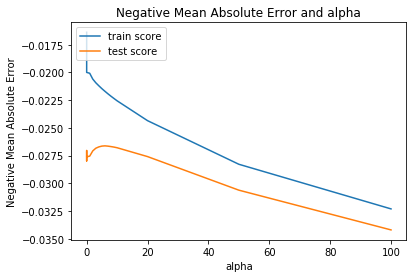

In [1573]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [1574]:
alpha = 7
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.60111425e-02, -1.37557825e-03,  2.24591943e-02,  7.72319433e-02,
        2.82314218e-02,  9.70848868e-05,  3.01748165e-04,  3.07912143e-02,
        1.66299355e-02,  9.43485299e-03,  2.12440677e-02,  2.57598153e-02,
        4.90972598e-02,  6.87697886e-02, -4.84932898e-03,  6.75657900e-02,
        2.76826128e-02,  1.42695704e-03,  4.04792700e-02,  1.23748052e-02,
        8.03230974e-03, -1.31027551e-02,  4.05531509e-02,  1.97644859e-02,
       -3.67116277e-04,  4.11107093e-02,  2.55974275e-02,  1.87314986e-02,
        2.74623029e-03,  2.66855536e-03,  1.17367411e-02,  6.93078107e-03,
        6.12478566e-03, -7.27005506e-04, -2.12682680e-03, -4.69197813e-03,
        7.25241123e-03,  7.56927171e-03,  1.11745366e-02,  4.87248122e-03,
        5.07085664e-03,  3.90787991e-03, -1.49065565e-02, -8.20582902e-05,
        1.68358570e-02,  1.47652467e-02,  1.89905707e-02, -5.71414336e-03,
        1.49982497e-02, -1.57538966e-02, -4.89364975e-03, -3.15277976e-03,
        8.23918018e-03,  

In [1575]:
# Ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.202),
 ('MSSubClass', -0.026),
 ('LotFrontage', -0.001),
 ('LotArea', 0.022),
 ('OverallQual', 0.077),
 ('OverallCond', 0.028),
 ('YearBuilt', 0.0),
 ('YearRemodAdd', 0.0),
 ('MasVnrArea', 0.031),
 ('BsmtFinSF1', 0.017),
 ('BsmtFinSF2', 0.009),
 ('BsmtUnfSF', 0.021),
 ('TotalBsmtSF', 0.026),
 ('1stFlrSF', 0.049),
 ('2ndFlrSF', 0.069),
 ('LowQualFinSF', -0.005),
 ('GrLivArea', 0.068),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.04),
 ('HalfBath', 0.012),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', -0.013),
 ('TotRmsAbvGrd', 0.041),
 ('Fireplaces', 0.02),
 ('GarageYrBlt', -0.0),
 ('GarageCars', 0.041),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.019),
 ('OpenPorchSF', 0.003),
 ('EnclosedPorch', 0.003),
 ('3SsnPorch', 0.012),
 ('ScreenPorch', 0.007),
 ('PoolArea', 0.006),
 ('MiscVal', -0.001),
 ('MoSold', -0.002),
 ('YrSold', -0.005),
 ('MSZoning_FV', 0.007),
 ('MSZoning_RH', 0.008),
 ('MSZoning_RL', 0.011),
 ('MSZoning_RM', 0.005),
 ('Street_Pave', 0

We will go head with the Lasso model with business impacting features as [('constant', -1.854),
 ('MSSubClass', -0.028),
 ('OverallQual', 0.158),
 ('GrLivArea', 0.239),
 ('BsmtFullBath', 0.006),
 ('TotRmsAbvGrd', 0.013),
 ('GarageCars', 0.049),
 ('Neighborhood_Crawfor', 0.014),
 ('Neighborhood_Edwards', -0.006),
 ('Neighborhood_NoRidge', 0.059),
 ('Neighborhood_NridgHt', 0.028),
 ('Condition1_Norm', 0.007),
 ('RoofStyle_Gable', -0.005),
 ('ExterQual_TA', -0.012),
 ('BsmtExposure_Gd', 0.033),
 ('BsmtFinType1_GLQ', 0.011),
 ('KitchenQual_Gd', -0.016),
 ('KitchenQual_TA', -0.018),
 ('FireplaceQu_OK Fireplace', 0.021),
 ('GarageType_Attchd', 0.002),
 ('GarageFinish_Unf', -0.003),
 ('SaleType_New', 0.007),
